# Basic charts in pandas

### documentation

> https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

> Source (pubs): https://www.ons.gov.uk/businessindustryandtrade/business/activitysizeandlocation/datasets/publichousesandbarsbylocalauthority

> Source (population): https://statswales.gov.wales/Catalogue/Population-and-Migration/Population/Estimates/Local-Authority/populationestimates-by-localauthority-year

> plots available in pandas


        ‘line’ : line plot (default)
        ‘bar’ : vertical bar plot
        ‘barh’ : horizontal bar plot
        ‘hist’ : histogram
        ‘box’ : boxplot
        ‘kde’ : Kernel Density Estimation plot
        ‘density’ : same as ‘kde’
        ‘area’ : area plot
        ‘pie’ : pie plot
        ‘scatter’ : scatter plot
        ‘hexbin’ : hexbin plot



In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [19]:
# import population data in Wales for 2001, 2018

path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_population.csv'

pop = pd.read_csv(path + file)
# my_lovely_df = ....

In [21]:
pop[:3]

,area,pop_one,pop_eighteen
0,Isle of Anglesey,"67,806","69,961"
1,Gwynedd,"116,844","124,178"
2,Conwy,"109,674","117,181"


In [22]:
# rename cols

pop.columns = ['area', 'pop_one', 'pop_eighteen']

pop.head()

,area,pop_one,pop_eighteen
0,Isle of Anglesey,"67,806","69,961"
1,Gwynedd,"116,844","124,178"
2,Conwy,"109,674","117,181"
3,Denbighshire,"93,070","95,330"
4,Flintshire,"148,629","155,593"


In [23]:
# check data types 

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          22 non-null     object
 1   pop_one       22 non-null     object
 2   pop_eighteen  22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes


In [24]:
# fix integers

# remove the ,
pop = pop.replace(',','', regex = True)

# cast population columns to integers
pop.pop_one = pop.pop_one.astype(int)
pop.pop_eighteen = pop.pop_eighteen.astype(int)

In [25]:
# check datatypes again

print(pop.info())
pop[:3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          22 non-null     object
 1   pop_one       22 non-null     int64 
 2   pop_eighteen  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes
None


,area,pop_one,pop_eighteen
0,Isle of Anglesey,67806,69961
1,Gwynedd,116844,124178
2,Conwy,109674,117181


## Bar chart

In [10]:
# use area names column as index (instead of row numbers) - this will label the x axis

pop.set_index('area', inplace=True)

In [11]:
pop.head()

,pop_one,pop_eighteen
area,,
Isle of Anglesey,67806,69961
Gwynedd,116844,124178
Conwy,109674,117181
Denbighshire,93070,95330
Flintshire,148629,155593


<AxesSubplot:>

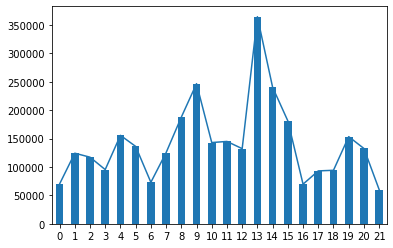

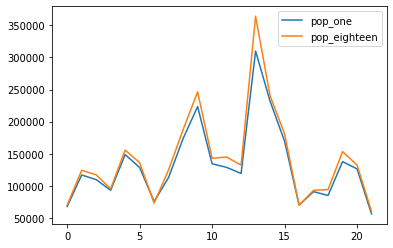

In [31]:
# bar chart

pop.pop_eighteen.plot(kind = 'bar')

pop['pop eighteen'].plot()

pop.plot()

<AxesSubplot:ylabel='area'>

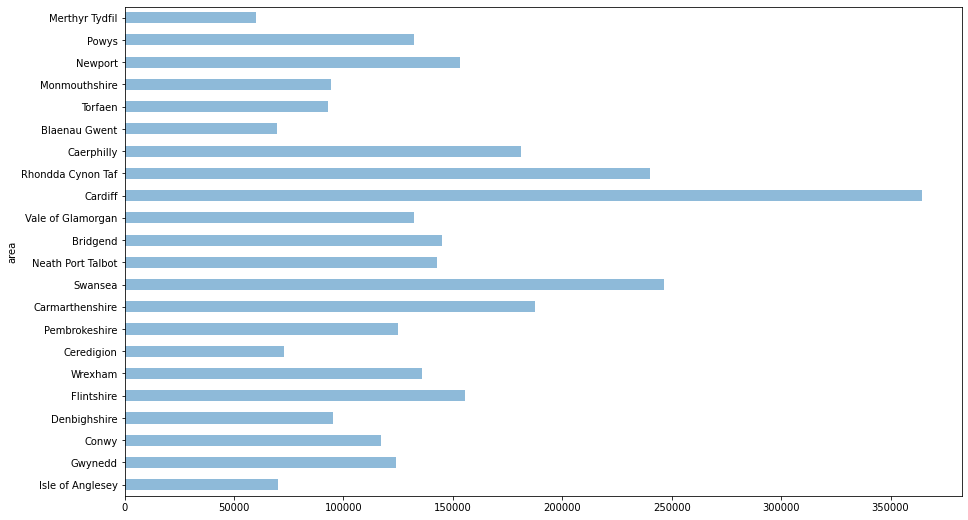

In [159]:
# # horizontal bar chart, with adjusted opacity and figure size

pop.pop_eighteen.plot(kind = 'barh', y = 'population (2018)', alpha = 0.5, figsize=(15,9))

<AxesSubplot:title={'center':'Population estimates mid-2001 & mid-2018 in Wales (by local authority)'}, ylabel='Area'>

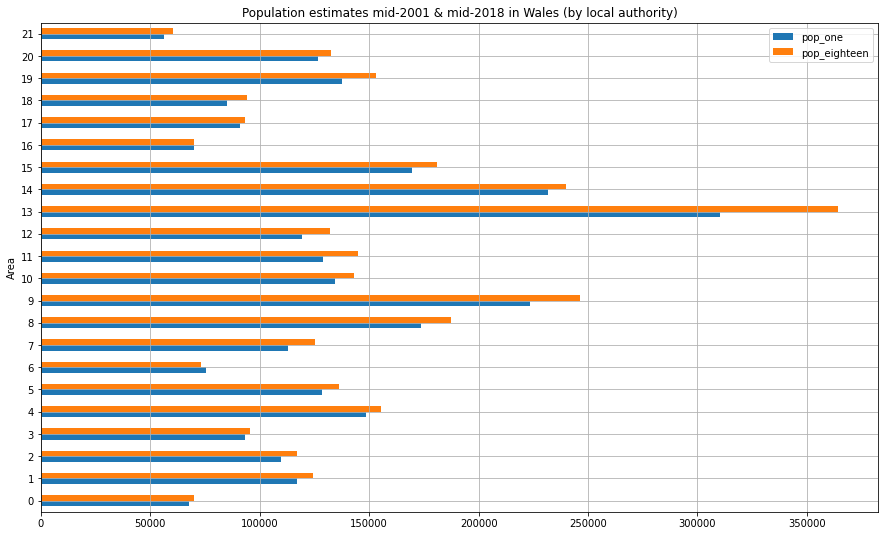

In [36]:
# stacked barchart with title, grid and labels

pop[['pop_one','pop_eighteen']].plot(kind = 'barh', 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     xlabel = 'Area', 
                                     ylabel = 'Population')

## Linechart

> using numbers of pubs in Wales by local authority 2001-18

In [15]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_pubs_area_2001_18.csv'

years = pd.read_csv(path + file)

In [17]:
years

,code,area,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,W06000001,Isle of Anglesey,75,85,90,85,85,90,90,80,80,75,70,75,55,60,60,60,60,60
1,W06000002,Gwynedd,135,135,145,145,135,145,150,160,150,135,130,140,140,140,125,120,120,120
2,W06000003,Conwy,105,115,95,105,115,115,120,120,105,100,100,105,95,100,100,90,95,100
3,W06000004,Denbighshire,110,120,115,115,115,120,120,115,105,95,90,95,100,105,110,95,90,90
4,W06000005,Flintshire,145,145,150,150,160,155,170,170,150,130,130,125,130,120,110,115,110,100
5,W06000006,Wrexham,130,140,105,110,120,135,135,130,115,115,115,110,105,105,100,95,85,90
6,W06000008,Ceredigion,75,80,85,90,90,90,100,105,95,95,95,95,85,80,80,75,75,75
7,W06000009,Pembrokeshire,205,205,200,215,220,220,230,225,220,200,185,185,175,170,175,165,170,160
8,W06000010,Carmarthenshire,225,235,225,235,230,235,235,230,200,185,175,180,165,155,155,145,140,140
9,W06000011,Swansea,200,230,215,220,225,235,230,215,215,195,185,165,155,165,165,160,160,160


In [183]:
# set the area name as the index

years = years.set_index('area')

In [206]:
# transpose the df so the years run on the vertical index

years = years.transpose()

<AxesSubplot:>

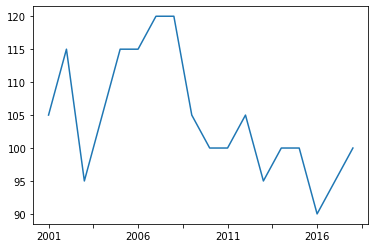

In [216]:
years['Conwy'].plot()

<AxesSubplot:>

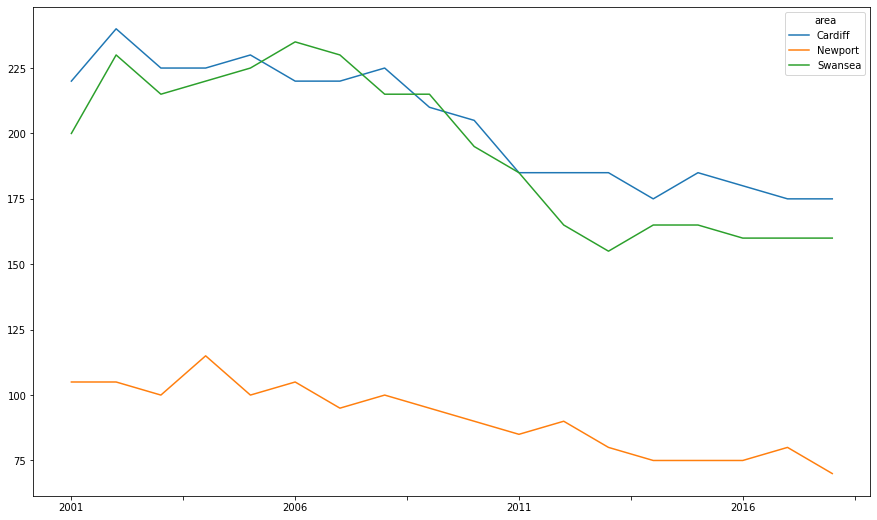

In [215]:
years[['Cardiff', 'Newport', 'Swansea']].plot(figsize = (15, 9))

## Scatterplot

> Wales pubs and population in 2018: gives a (dependent) variable to set against population: the number of pubs in local authorities

In [168]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_all.csv'

pp = pd.read_csv(path + file)

In [169]:
pp[:3]

,area,pubs,pop
0,Isle of Anglesey,60,69961
1,Gwynedd,120,124178
2,Conwy,100,117181


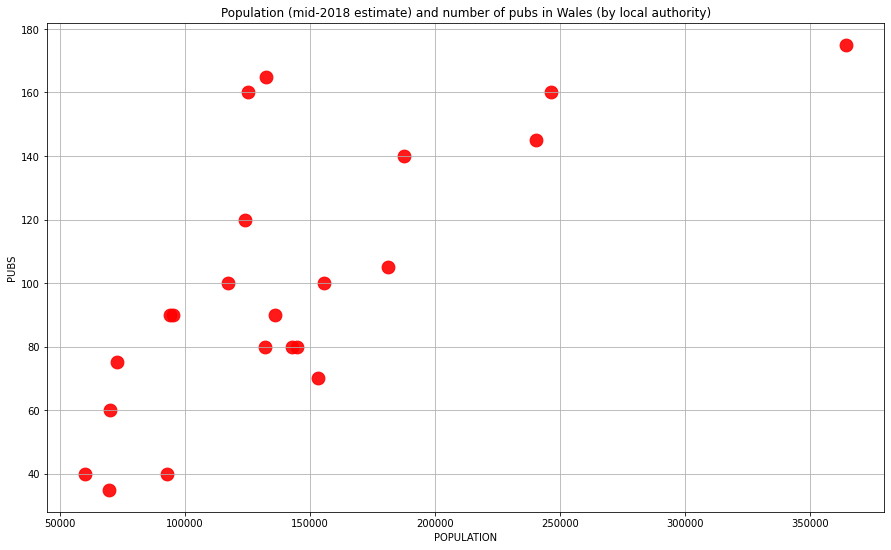

In [173]:
# scatterplot with dotsize (s) and dotcolour (c)

pp.plot(kind = 'scatter', 
        x = 'pop', 
        y = 'pubs', 
        figsize=(15,9),
        alpha = 0.9,
        title = ('Population (mid-2018 estimate) and number of pubs in Wales (by local authority)'),
        grid = True,
        s = 165, 
        c = 'r',
        xlabel = 'POPULATION',
        ylabel = 'PUBS')

# save to current directory
plt.savefig('wales_pop_pub.png')

## Histogram

<AxesSubplot:>

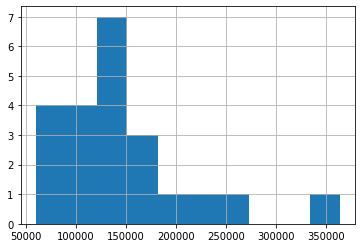

In [166]:
# histogram on a single column

pop.pop_eighteen.hist()

<AxesSubplot:title={'center':'Population estimates mid-2001 & mid-2018 in Wales (by local authority)'}, ylabel='Frequency'>

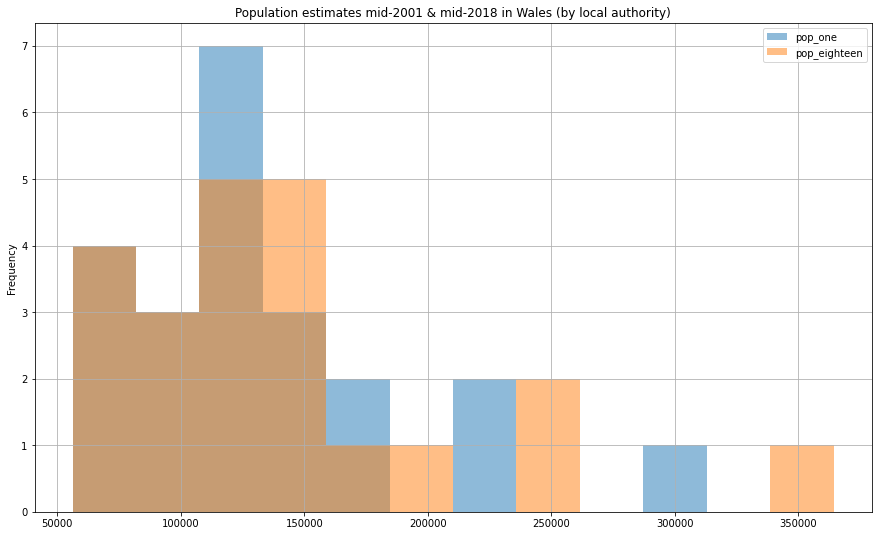

In [167]:
# histogram on both cols

pop[['pop_one','pop_eighteen']].plot(kind = 'hist', 
                                     alpha = 0.5, 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     bins = 12,
                                     xlabel = 'Area', 
                                     ylabel = 'Population')


## Piechart

<AxesSubplot:ylabel='pop_one'>

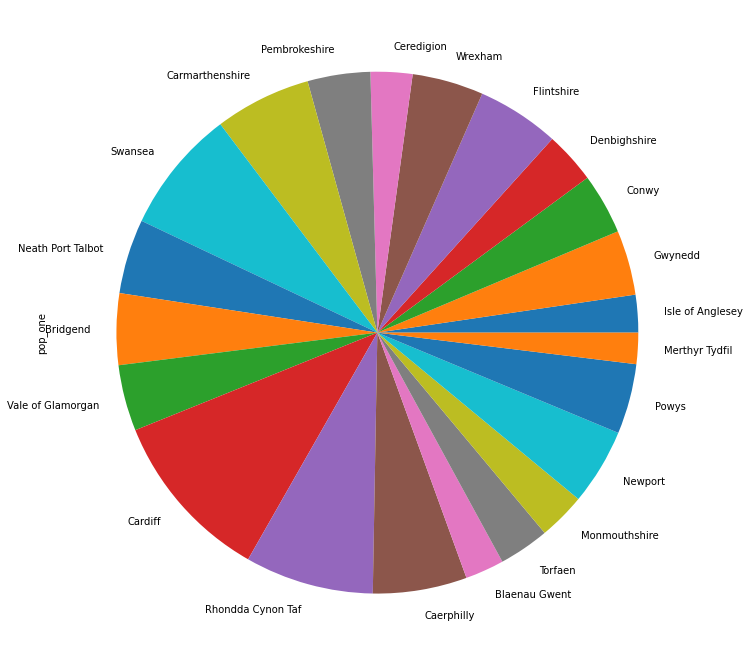

In [138]:
# piechart

pop['pop_one'].plot.pie(figsize=(20,12))


## Boxplot

<AxesSubplot:>

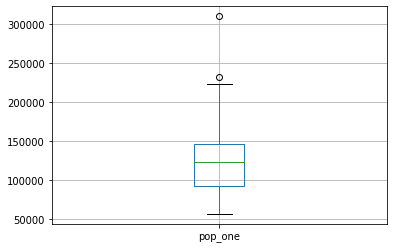

In [161]:
# box plots by single column...

pop.boxplot('pop_one') 

<AxesSubplot:>

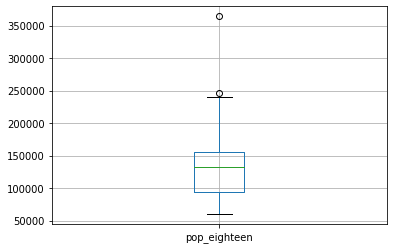

In [162]:
pop.boxplot('pop_eighteen')

<AxesSubplot:>

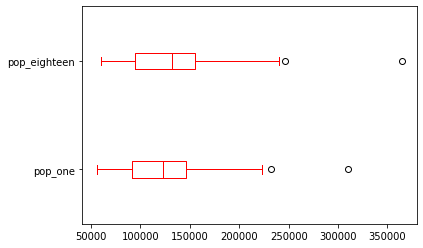

In [164]:
# ... and by df (with default vertical turned off) and colour selected

pop.boxplot(vert = False, grid = False, color = 'red')